<a href="https://colab.research.google.com/github/yasararafath-s/Sentiment_analysis_imdb_lstm/blob/main/Sentiment_Analysis_of_IMDB_Movie_Reviews_Using_LSTM_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis of IMDB Movie Reviews Using LSTM_tensorflow

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

In [2]:
# Load and preprocess data
max_features = 10000  # Vocabulary size
max_len = 500         # Max length of sequences

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

In [3]:
# Data preview
print("Data sample (as integers):", x_train[0])
print("Label sample:", y_train[0])

Data sample (as integers): [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0

In [4]:
# Build the TensorFlow model
model_tf = Sequential([
    Embedding(max_features, 128, input_length=max_len),
    LSTM(128, return_sequences=True),
    Dropout(0.5),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

model_tf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [5]:
# Train the TensorFlow model
history_tf = model_tf.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 609s 2s/step - accuracy: 0.7017 - loss: 0.5563 - val_accuracy: 0.6760 - val_loss: 0.5797
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 605s 2s/step - accuracy: 0.8680 - loss: 0.3231 - val_accuracy: 0.8604 - val_loss: 0.3280
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 617s 2s/step - accuracy: 0.9168 - loss: 0.2151 - val_accuracy: 0.7996 - val_loss: 0.4241
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 616s 2s/step - accuracy: 0.9349 - loss: 0.1691 - val_accuracy: 0.8360 - val_loss: 0.3830
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 571s 2s/step - accuracy: 0.9643 - loss: 0.1023 - val_accuracy: 0.8612 - val_loss: 0.3805


In [6]:
# Evaluate the TensorFlow model
predictions_tf = (model_tf.predict(x_test) > 0.5).astype(int).flatten()
accuracy_tf = accuracy_score(y_test, predictions_tf)
precision_tf = precision_score(y_test, predictions_tf)
recall_tf = recall_score(y_test, predictions_tf)
f1_tf = f1_score(y_test, predictions_tf)

print(f"TensorFlow Model Accuracy: {accuracy_tf}")
print(f"Precision: {precision_tf}, Recall: {recall_tf}, F1 Score: {f1_tf}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 247s 316ms/step
TensorFlow Model Accuracy: 0.85588
Precision: 0.878499106611078, Recall: 0.826, F1 Score: 0.8514410588380819


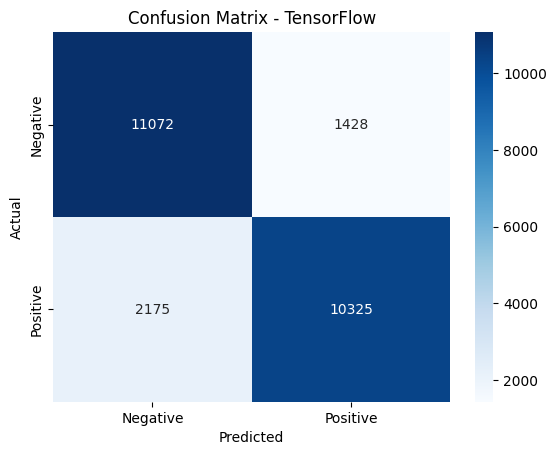

In [7]:
# Plot Confusion Matrix
cm_tf = confusion_matrix(y_test, predictions_tf)
sns.heatmap(cm_tf, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - TensorFlow')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


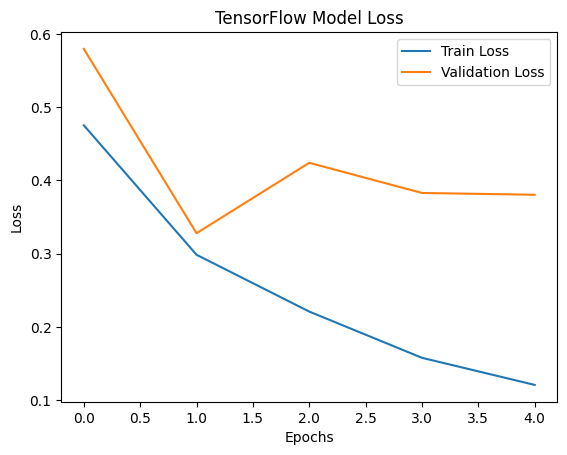

In [8]:
# Plot training and validation loss
plt.plot(history_tf.history['loss'], label='Train Loss')
plt.plot(history_tf.history['val_loss'], label='Validation Loss')
plt.title('TensorFlow Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [9]:
# Save the model
model_tf.save('lstm_SA_imdb_model.h5')
print("Model saved successfully!")

Model saved successfully!
